# Credit Card Fraud Prediction For Imbalced Class

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\HP LAPTOP\\Downloads\\creditcard.csv')

In [48]:
print("shape of the dataset:",df.shape)
df.head()

shape of the dataset: (284807, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [47]:
df.dtypes

V1            float64
V2            float64
V3            float64
V4            float64
V5            float64
V6            float64
V7            float64
V8            float64
V9            float64
V10           float64
V11           float64
V12           float64
V13           float64
V14           float64
V15           float64
V16           float64
V17           float64
V18           float64
V19           float64
V20           float64
V21           float64
V22           float64
V23           float64
V24           float64
V25           float64
V26           float64
V27           float64
V28           float64
Class           int64
normAmount    float64
dtype: object

In [5]:
df.apply(lambda x: len(x.unique()))

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.isnull().values.any()

False

In [8]:
df['Amount'].value_counts().sort_index()

0.00        1825
0.01         718
0.02          85
0.03           3
0.04          11
0.05          44
0.06           3
0.07          11
0.08          10
0.09           2
0.10          34
0.11          23
0.12         234
0.13           5
0.14           5
0.15          19
0.16           2
0.17           7
0.18           1
0.19           4
0.20           7
0.22          36
0.23          51
0.24          10
0.25           5
0.26           3
0.27           7
0.28          13
0.29           1
0.30          13
            ... 
6454.74        1
6511.00        1
6652.89        1
6669.00        1
6828.00        1
6900.47        1
6950.51        1
6982.67        1
6998.00        1
7367.00        1
7429.15        1
7541.70        1
7583.32        1
7636.30        1
7712.43        1
7766.60        1
7862.39        1
7879.42        1
8182.70        1
8360.00        1
8787.00        1
8790.26        1
10000.00       1
10199.44       1
11789.84       1
11898.09       1
12910.93       1
18910.00      

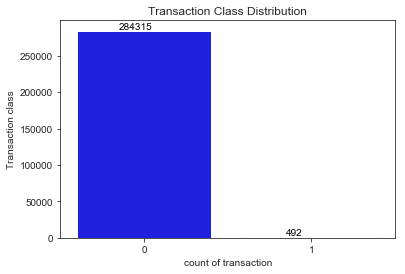

In [9]:
sns.set_style('ticks')
ax = sns.countplot(df['Class'],color='blue')
plt.xlabel("count of transaction")
plt.ylabel('Transaction class')
plt.title("Transaction Class Distribution")
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

In [10]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
## Get the Fraud and the normal dataset 
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

In [12]:
print(" no of Fraud Transaction :",fraud.shape)
print(" no of normal Transaction :",normal.shape)

 no of Fraud Transaction : (492, 31)
 no of normal Transaction : (284315, 31)


In [13]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

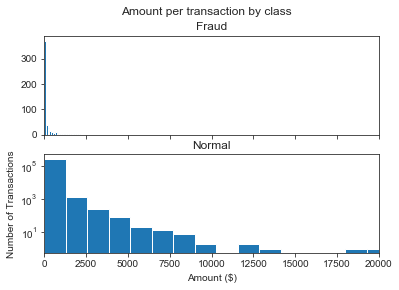

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Amount per transaction by class')
ax1.hist(fraud['Amount'], bins = 20)
ax1.set_title('Fraud')
ax2.hist(normal['Amount'], bins = 20)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

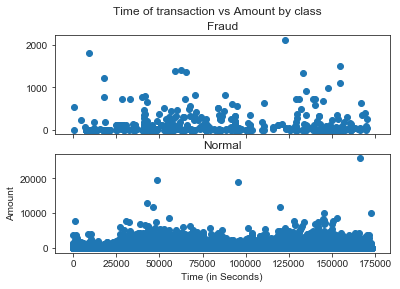

In [18]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud['Time'], fraud['Amount'])
ax1.set_title('Fraud')
ax2.scatter(normal['Time'], normal['Amount'])
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time', 'Amount'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [20]:
X = df.drop('Class',axis=1)
y = df['Class']
print('shape of X is {}'.format(X.shape))
print('shape of y is {}'.format(y.shape))

shape of X is (284807, 29)
shape of y is (284807,)


In [21]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443,)


In [22]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (398038, 29)
After OverSampling, the shape of train_y: (398038,) 



In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import accuracy_score

In [24]:
lr = LogisticRegression()

In [25]:
parameters = {'C': np.linspace(1, 10, 10)}

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
grid_search = GridSearchCV(estimator=lr,param_grid=parameters,cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
                           scoring='f1',n_jobs=-1)

In [27]:
grid_search.fit(X_train_res,y_train_res.ravel())

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             scoring='f1')

In [28]:
grid_search.best_params_

{'C': 10.0}

In [29]:
grid_search.best_score_

0.9433401979597438

In [30]:
lr = LogisticRegression(C = 10.0)
lr.fit(X_train_res,y_train_res.ravel())
y_predict= lr.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_predict))

accuracy_score: 0.9752583593740857


In [35]:
scores = cross_val_score(lr,X_train_res,y_train_res,cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
                         scoring='f1',n_jobs=-1)

In [36]:
scores.mean()

0.9435267447723023

# AUC and ROC Curve

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [39]:
y_pred_prob = lr.predict_proba(X_test)[:,1]

In [40]:
y_pred_prob

array([0.16782711, 0.17646794, 0.16291861, ..., 0.04403156, 0.10288304,
       0.12859998])

In [41]:
tpr,fpr,thresholds = roc_curve(y_test,y_pred_prob)

In [42]:
tpr

array([0.00000000e+00, 1.05514913e-04, 1.28962671e-04, ...,
       9.99929657e-01, 9.99953104e-01, 1.00000000e+00])

In [43]:
fpr

array([0.        , 0.3877551 , 0.39455782, ..., 1.        , 1.        ,
       1.        ])

In [44]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       2.25253531e-25, 2.62403788e-26, 1.15520836e-34])

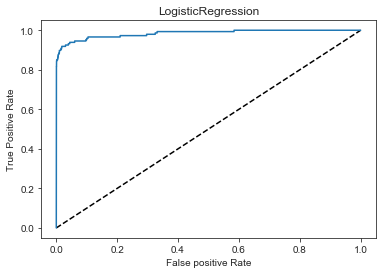

In [45]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label ='LogisticRegression')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression')
plt.show()